In [17]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [18]:
oliv = datasets.fetch_olivetti_faces()

In [19]:
oliv.keys()

dict_keys(['data', 'target', 'images', 'DESCR'])

In [20]:
oliv['data'].shape

(400, 4096)

In [21]:
oliv['images'].shape

(400, 64, 64)

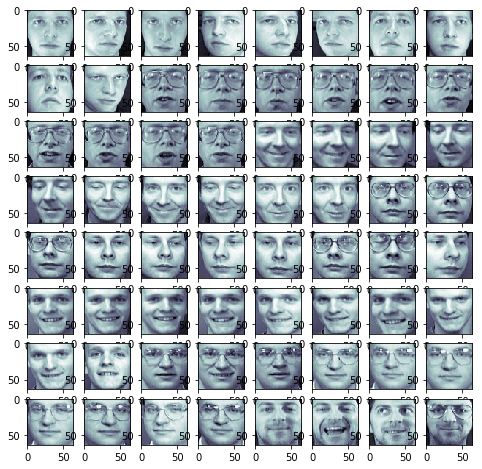

In [22]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax =fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i],cmap = plt.cm.bone)
plt.show()

In [23]:
x = oliv.data
y = oliv.target

In [24]:
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
pca.components_.shape

(400, 4096)

In [28]:
k = 0
total = sum(pca.explained_variance_)
current_sum = 0
while current_sum/total<0.95:
    current_sum = current_sum + pca.explained_variance_[k]
    k = k+1
k

123

In [30]:
pca = PCA(n_components = k,whiten=True)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [32]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [33]:
#WE HAVE GOT EXACT SAME SHAPE , BUT IMAGES WON'T BE EXACTLY SAME

In [34]:
x_approx_images = x_approx.reshape((400,64,64))

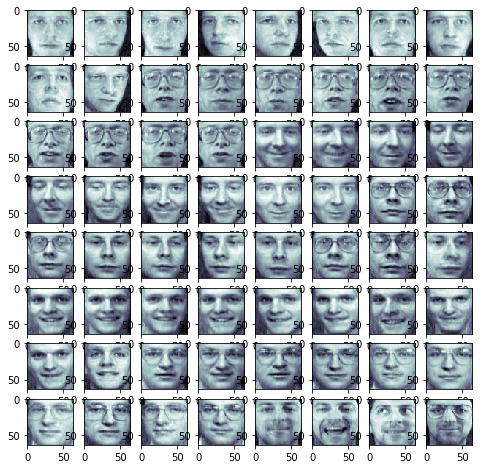

In [36]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax =fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i],cmap = plt.cm.bone)
plt.show()

In [ ]:
#EIGEN FACES

In [37]:
eigenv = pca.components_
eigenv.shape

(123, 4096)

In [38]:
eigenfaces = eigenv.reshape((123,64,64))

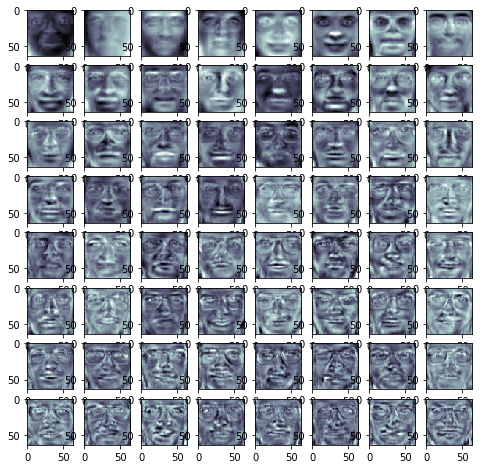

In [39]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i],cmap=plt.cm.bone)
plt.show()